In [45]:
import numpy as np

In [ ]:
#formulate original state space equation
class ModelPredictiveControl(object):
    def __init__(self, A, B, C, f, v, W3, W4, x0, total):
        self.A=A
        self.B=B
        self.C=C
        self.f=f
        self.v=v
        self.W3=W3
        self.W4=W4
        self.total=total
# State-space dimensions
        n_states = 10  # [x, y, z, vx, vy, vz, ax, ay, az, m]
        n_controls = 2  # [T1, T2]

        self.X = np.zeros((n_states, 1))
        self.U = np.zeros((n_controls, 1))

        self.A = np.zeros((n_states, n_states))
        self.B = np.zeros((n_states, n_controls))

        self.Xnew = np.dot(A, X) + np.dot(B, U)

    def formLiftedMatrices(self):
        #f is prediction horizon
        #v is control horizon

        f=self.f
        v=self.v
        r=self.r
        n=self.n
        m=self.m
        A=self.A
        B=self.B
        C=self.C
        
        O=np.zeros(shape=(f*r,n))

        #what is r?
        #lifted matrix with C* A^i wrt prediction horizon
        for i in range(f):
            if (i==0):
                powA=A
            else:
                powA=np.matmul(powA,A)
            O[i*r:(i+1)*r,:]=np.matmul(C,powA)
            #dimensions of blocks of A are rows of CA which is rxn dim, 
            #lifted matrix of O at row index i*r to i+1*r
        
        #lifted matrix M for U
        M=np.zeros(shape=(f*r,v*m))
        #inputs: control horizon, dim of u?

        for i in range(f):
            if (i<v):
                for j in range(i+1):
                    if (j==0):
                        powA = np.eye(n,n)
                    else:
                        powA=np.matmul(powA,A)
                    M[i*r:(i+1)*r,(i-j)*m:(i-j+1)*m]=np.matmul(C,np.matmul(powA,B))
            else:
                    for j in range(v):
                        # here we form the last entry
                        if j==0:
                            sumLast=np.zeros(shape=(n,n))
                            for s in range(i-v+2):
                                if (s == 0):
                                    powA=np.eye(n,n)
                                else:
                                    powA=np.matmul(powA,A)
                                sumLast=sumLast+powA
                            M[i*r:(i+1)*r,(v-1)*m:(v)*m]=np.matmul(C,np.matmul(sumLast,B))
                        else:
                            powA=np.matmul(powA,A)
                            M[i*r:(i+1)*r,(v-1-j)*m:(v-j)*m]=np.matmul(C,np.matmul(powA,B))
            
            
            tmp1=np.matmul(M.T,np.matmul(self.W4,M))
            tmp2=np.linalg.inv(tmp1+self.W3)
            gainMatrix=np.matmul(tmp2,np.matmul(M.T,self.W4))
            
            
            return O,M,gainMatrix
                    #from control horizon to prediction horizon (where u becomes a constant)
                    #MUCH NEEDED dim analysis



        #v is prediction horizion, m is number of vars in U?

        #rows outputs, columns inputs


In [ ]:
# State-space dimensions
n_states = 24  # [x, y, z, vx, vy, vz, ax, ay, az, m]
n_controls = 2  # [T1, T2]

# f is prediction horizon
f=90
# v is control horizon
v=60

# Assume a control experiment which starts from: 0 seconds, ends at: 30 seconds
t_0 = 0
t_n = 30*60
dt = 1/60

z_d = "will see"

A=np.zeros((n_states, n_states))
B=np.zeros((n_states, n_controls))
C=np.zeros((n_states, n_states))

# W3=np.zeros()
# W4=np.zeros()

# total=


X = np.zeros((n_states, 1))
U = np.zeros((n_controls, 1))
A = np.zeros((n_states, n_states))
B = np.zeros((n_states, n_controls))
Xnew = np.dot(A, X) + np.dot(B, U)

 #create expanded Z coefficient matrix for recursive prediction repre(in for loop form)
 #model cost function of U
 #model cost function of Z

# Weight Matrices for $J_u$:
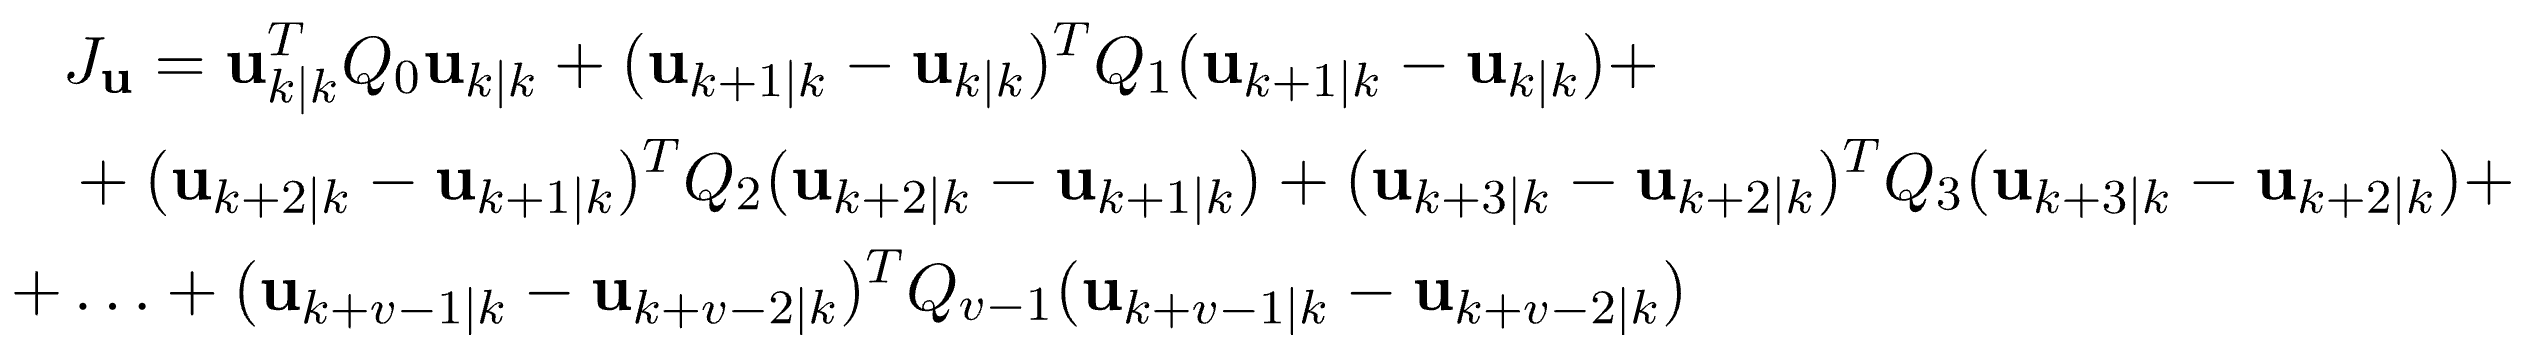
# We'll abstract away this into: $J_u = \underbar u^{T} \underbar W_{3} \underbar u$<br>
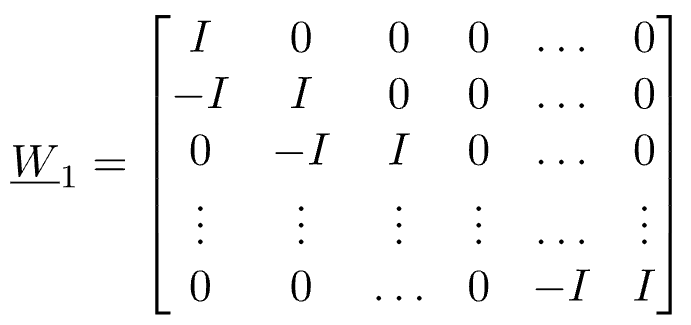
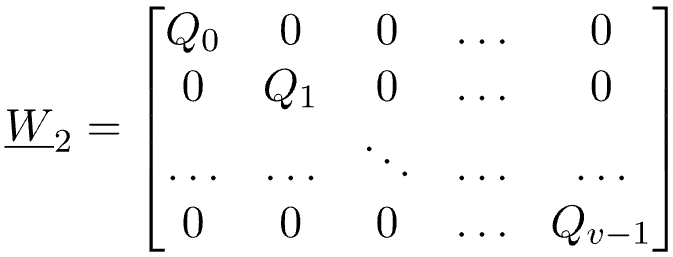
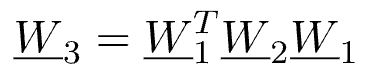

In [36]:
type(np.zeros((1,1)))

numpy.ndarray

In [47]:
w1 = np.zeros((v,v), dtype=np.ndarray)

print(np.shape(w1))

def populate_w1(w1):
    # w1 is a square matrix of dimensions
    dim = np.shape(w1)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                w1[row,column] = I # diagonal element
            elif (row-1 == column) and (row-1 >= 0):
                w1[row,column] = -I # diagonal element
            else:
                w1[row,column] = zeros

    return w1

w1 = populate_w1(w1)
w1


(60, 60)


array([[array([[1., 0., 0., ..., 0., 0., 0.],
               [0., 1., 0., ..., 0., 0., 0.],
               [0., 0., 1., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 1., 0., 0.],
               [0., 0., 0., ..., 0., 1., 0.],
               [0., 0., 0., ..., 0., 0., 1.]], shape=(60, 60)),
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]], shape=(60, 60)),
        array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]], shape=(60, 60)), ...,
        array([[0., 0., 0., ..., 0., 0., 0.],
       

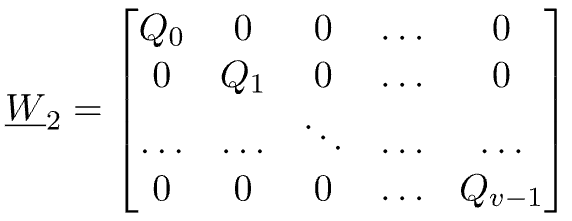

In [43]:
w2 = np.zeros((v,v), dtype=np.ndarray)
def populate_w2(w2):
    dim = np.shape(w2)[0]
    I = np.eye(dim)
    zeros = 0
    Q_values = 0.0001 * (np.random.rand(v,v)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                Q_matrix = f"Q_{row}"
                w2[row, column] = Q_matrix
            else:
                w2[row, column] = zeros
    return w2

populate_w2(w2)

array([['Q_0', 0, 0, ..., 0, 0, 0],
       [0, 'Q_1', 0, ..., 0, 0, 0],
       [0, 0, 'Q_2', ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 'Q_57', 0, 0],
       [0, 0, 0, ..., 0, 'Q_58', 0],
       [0, 0, 0, ..., 0, 0, 'Q_59']], shape=(60, 60), dtype=object)

In [ ]:
w2 = np.zeros((v,v), dtype=np.ndarray)

# print(Q)
# print("\n\n\n")
# I = np.eye(v,v)
# print(np.matmul(I, Q[1]))

def populate_w2(w2):
    dim = np.shape(w2)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    Q_values = 0.0001 * (np.random.rand(dim,dim)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                Q_matrix = np.diag(Q_values[row])
                w2[row, column] = Q_matrix
            else:
                w2[row, column] = zeros
    return w2

w2 = populate_w2(w2)



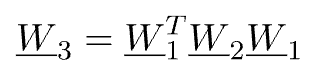

In [ ]:
w3 = np.zeros((v,v))

def populate_w3(w1,w2):
    return np.matmul(np.transpose(w1), (np.matmul(w2, w1)))

print(w3)

[[array([[3.30543272e-05, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 5.30928822e-05, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 1.75589195e-04, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.06194924e-04, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 1.44475932e-04, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 9.80437831e-05]], shape=(60, 60))
  array([[-6.76734667e-06,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00, -8.48701442e-07,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,

# For $J_z$ we have W4:
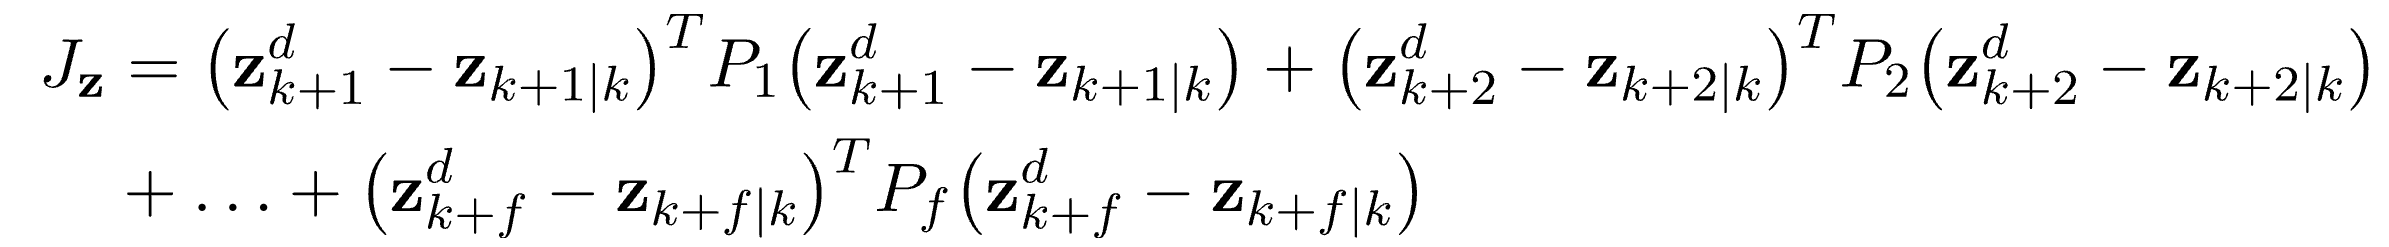
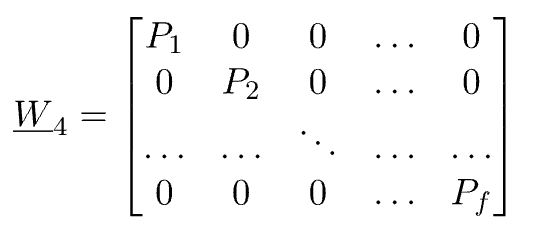

In [ ]:
w4 = np.zeros((f,f), dtype=np.ndarray)

def populate_w4(w4):
    dim = np.shape(w4)[0]
    I = np.eye(dim)
    zeros = np.zeros((dim, dim))
    P_values = 0.0001 * (np.random.rand(dim,dim)) # WILL ACTUALLY COME FROM REINFORCEMENT LEARNING

    for row in range(dim): # row iteration
        for column in range(dim):
            if row == column:
                # the rows of Q_values becomes the diagonal elements of Q_i matrices, which in turn are diag elements of W2
                P_matrix = np.diag(P_values[row])
                w4[row, column] = P_matrix
            else:
                w4[row, column] = zeros
    return w4




# Final Step:
Use the analytical result of the optimization equation to calculate u underbar:
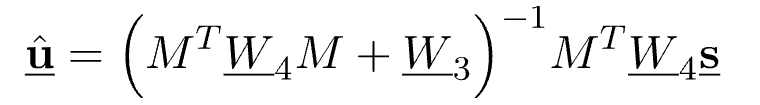